In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, MaxPool2D, Flatten
from tensorflow.keras.regularizers import L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
size = 28
pixels = size*size
train_data = np.loadtxt('mnist_train.csv', delimiter = ',')
test_data = np.loadtxt('mnist_test.csv', delimiter = ',')


In [ ]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [5]:
train_imgs = train_imgs.reshape((-1, 28, 28, 1))
test_imgs = test_imgs.reshape((-1, 28, 28, 1))

In [6]:
y_train = np.zeros((60000, 10))

In [7]:
for i in range(len(train_labels)):
    y = int(train_labels[i][0])
    # print(int(y))
    # i = np.where(train_labels == y0)
    # print(i)
    
    y_train[i][y] = 1
    if i%1000 == 0:
        print("Rows added =", i+1)

Rows added = 1
Rows added = 1001
Rows added = 2001
Rows added = 3001
Rows added = 4001
Rows added = 5001
Rows added = 6001
Rows added = 7001
Rows added = 8001
Rows added = 9001
Rows added = 10001
Rows added = 11001
Rows added = 12001
Rows added = 13001
Rows added = 14001
Rows added = 15001
Rows added = 16001
Rows added = 17001
Rows added = 18001
Rows added = 19001
Rows added = 20001
Rows added = 21001
Rows added = 22001
Rows added = 23001
Rows added = 24001
Rows added = 25001
Rows added = 26001
Rows added = 27001
Rows added = 28001
Rows added = 29001
Rows added = 30001
Rows added = 31001
Rows added = 32001
Rows added = 33001
Rows added = 34001
Rows added = 35001
Rows added = 36001
Rows added = 37001
Rows added = 38001
Rows added = 39001
Rows added = 40001
Rows added = 41001
Rows added = 42001
Rows added = 43001
Rows added = 44001
Rows added = 45001
Rows added = 46001
Rows added = 47001
Rows added = 48001
Rows added = 49001
Rows added = 50001
Rows added = 51001
Rows added = 52001
Rows a

In [8]:
test_labels.shape

(10000, 1)

In [9]:
y_test = np.zeros((10000, 10))

In [10]:
for i in range(len(test_labels)):
    y = int(test_labels[i][0])
    # print(int(y))
    # i = np.where(train_labels == y0)
    # print(i)
    
    y_test[i][y] = 1
    if i%1000 == 0:
        print("Rows added =", i+1)

Rows added = 1
Rows added = 1001
Rows added = 2001
Rows added = 3001
Rows added = 4001
Rows added = 5001
Rows added = 6001
Rows added = 7001
Rows added = 8001
Rows added = 9001


In [11]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
import pickle

with open("pickled_mnist.pkl", "bw") as fh:
    data = (train_imgs, 
            test_imgs, 
            y_train,
            y_test)
    pickle.dump(data, fh)

### Data Preprocessing

In [6]:
import pickle
with open("pickled_mnist.pkl", "br") as f:
    data = pickle.load(f)

In [7]:
train_imgs = data[0]
test_imgs = data[1]
y_train = data[2]
y_test = data[3]

In [5]:
labels, counts = np.unique(y_train, axis = 0, return_counts = True)

<BarContainer object of 10 artists>

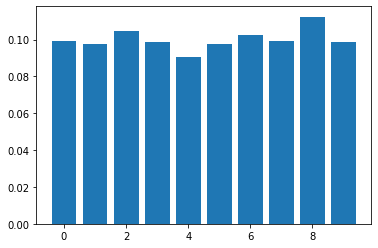

In [6]:
plt.bar(range(10),counts/60000)

5


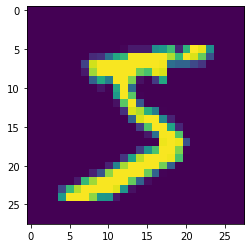

0


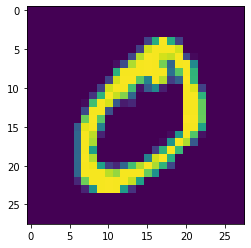

4


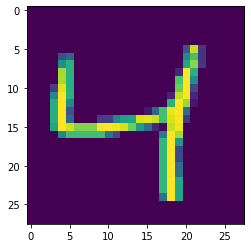

1


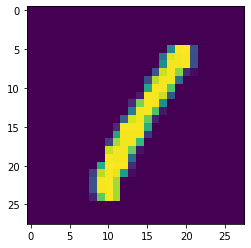

9


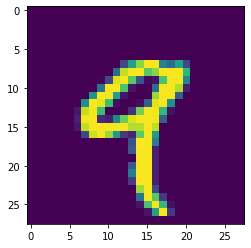

In [7]:
for i in range(5):
    print(np.argmax(y_train[i]))
    plt.imshow(train_imgs[i])
    plt.show()

### Model

In [69]:
model = Sequential([
    Conv2D(16, (3, 3), input_shape = (28, 28, 1), activation = 'relu', kernel_regularizer = tf.keras.regularizers.L2(0.01)),
    MaxPool2D((2, 2)),
    BatchNormalization(),
        
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [70]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 13, 13, 16)        64        
_________________________________________________________________
flatten_11 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                27050     
Total params: 27,274
Trainable params: 27,242
Non-trainable params: 32
_________________________________________________________________


In [71]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [72]:
cb = tf.keras.callbacks.ModelCheckpoint(filepath = 'model1.ckpt', save_weights_only = True, verbose = 1)

In [73]:
model.fit(train_imgs, y_train, epochs = 5, callbacks = [cb], validation_split = 0.1)

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1652 - accuracy: 0.9535 - val_loss: 0.0969 - val_accuracy: 0.9772

Epoch 00001: saving model to model1.ckpt
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0765 - accuracy: 0.9790 - val_loss: 0.0660 - val_accuracy: 0.9827

Epoch 00002: saving model to model1.ckpt
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0596 - accuracy: 0.9845 - val_loss: 0.0703 - val_accuracy: 0.9822

Epoch 00003: saving model to model1.ckpt
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0487 - accuracy: 0.9868 - val_loss: 0.0937 - val_accuracy: 0.9735

Epoch 00004: saving model to model1.ckpt
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9892 - val_loss: 0.0780 - val_accuracy: 0.9802

Epoch 00005: saving model to model1.ckpt


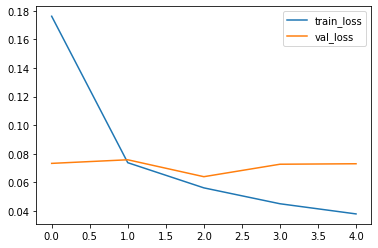

In [65]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])

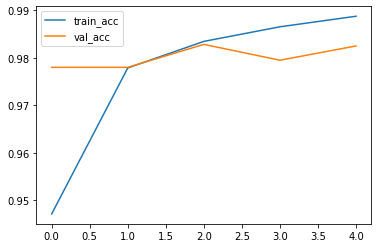

In [66]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])

In [12]:
model.save('model.h5')